In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

plt.style.use("dark_background")


In [76]:
file_path = "./Iris.csv"
iris_df = pd.read_csv(file_path)

iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [78]:

iris_df.describe()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [79]:
iris_df['Species'] = iris_df['Species'].astype('category')

In [80]:
iris_df.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [81]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

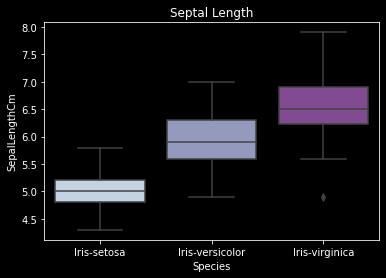

In [82]:
def iris_visualisation(df):

    ax1 = sns.boxplot(data=df, x="Species", y="SepalLengthCm",palette="BuPu")
    plt.title("Septal Length")
    plt.show()




iris_visualisation(iris_df)

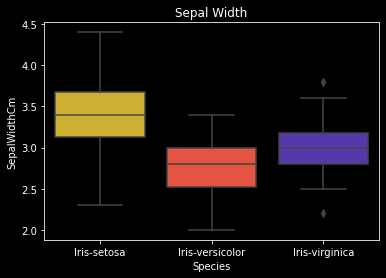

In [83]:
sns.boxplot(data=iris_df, x="Species", y="SepalWidthCm",palette="CMRmap_r")
plt.title("Sepal Width")
plt.show()

<AxesSubplot:ylabel='Density'>

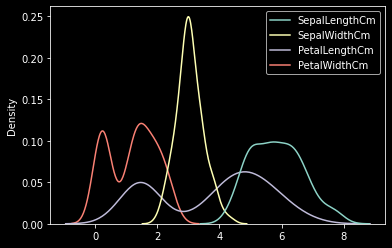

In [84]:
iris = iris_df.drop(columns=["Id","Species"])
sns.kdeplot(data=iris)

In [85]:
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
X  = iris_df.drop(columns=["Id","Species"])
y = iris_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size=0.3)

In [35]:
# standard_scaler =  StandardScaler()
# X_train = standard_scaler.fit_transform(X_train)

# X_test = standard_scaler.transform(X_test)




In [87]:
logistic_regression  = LogisticRegression()
logistic_regression.fit(X_train,y_train)

y_pred = logistic_regression.predict(X_test)

/Users/rishabhmer/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [88]:
print(logistic_regression.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [89]:
score = round(accuracy_score(y_test, y_pred=y_pred),2)
print(f"Accuracy Score {score}")

Accuracy Score 0.98


In [92]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [94]:
import pickle
pickle.dump(logistic_regression, open('iris_model.pkl','wb'))


In [95]:
pickled_file = pickle.load(open('iris_model.pkl', 'rb'))

#### <font color="orange"> Testing </font>

In [103]:
data = iris_df.values
prediction = pickled_file.predict(data[:,1:5][0].reshape(1,-1))

/Users/rishabhmer/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [106]:
print("Predicted Species: ",prediction[0])

Predicted Species:  Iris-setosa
